In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/train_sent_emo.csv')
train

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


In [3]:
train_main_characters = train.groupby('Speaker').count()
main_characters = ['Joey', 'Chandler', 'Monica', 'Ross', 'Rachel', 'Phoebe']
train_main_characters.loc[train_main_characters.index.isin(main_characters)]

,Sr No.,Utterance,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
Speaker,,,,,,,,,,
Chandler,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283
Joey,1509,1509,1509,1509,1509,1509,1509,1509,1509,1509
Monica,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299
Phoebe,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
Rachel,1435,1435,1435,1435,1435,1435,1435,1435,1435,1435
Ross,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459


Try embedding utterances into n-dimensional vectors.

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [5]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [6]:
train_main_characters = train.loc[train.Speaker.isin(main_characters)]
utterances = train_main_characters.Utterance.values
utterance_embedding = embed(utterances)
utterance_embedding.shape
train_main_characters['utterance_embedding'] = np.array(utterance_embedding).tolist()
train_main_characters

<ipython-input-6-24f50241b42b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_main_characters['utterance_embedding'] = np.array(utterance_embedding).tolist()


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,utterance_embedding
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731","[0.04014565050601959, -0.051745329052209854, -..."
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389","[0.06517025828361511, -0.01917901262640953, -0..."
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917","[-0.04735248163342476, -0.04601030796766281, -..."
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886","[0.03469827026128769, 0.00921012181788683, 0.0..."
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478","[-0.023070693016052246, 0.0071234614588320255,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9983,10473,It made me nuts.,Joey,disgust,negative,1038,12,2,3,"00:00:45,462","00:00:46,587","[-0.0028904543723911047, 0.029507873579859734,..."
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799","[-0.0026488155126571655, -0.07226027548313141,..."
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594","[-0.030905472114682198, 0.03388383984565735, 0..."
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520","[-0.03186885640025139, 0.06168394535779953, -0..."


In [7]:
def get_character_mean_embedding(character):
    char_utterances = list(train_main_characters.loc[
        train_main_characters.Speaker == character].utterance_embedding.values)
    return np.mean(char_utterances, axis=0)

char_mean_embeddings = [get_character_mean_embedding(character) for character in main_characters]
char_means = pd.DataFrame({'character': main_characters, 'mean_embedding': char_mean_embeddings})
char_means

,character,mean_embedding
0,Joey,"[-0.008905690746212386, -0.0013770109522265967..."
1,Chandler,"[-0.007865833963516079, -0.004844187634811227,..."
2,Monica,"[-0.006881404405495912, -0.0030519720884323196..."
3,Ross,"[-0.006710258384108515, -0.0019092836987221098..."
4,Rachel,"[-0.004846618463558712, -0.0011693483350633397..."
5,Phoebe,"[-0.005265476636027075, 3.374460261577395e-05,..."


In [8]:
from itertools import repeat
for i in char_means.index:
    character = char_means.iloc[i].character
    similarity = lambda a, b: np.inner(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    char_means[f"similarity_to_{character}"] = list(map(similarity, repeat(char_means.iloc[i].mean_embedding), char_means.mean_embedding))

In [9]:
char_means

,character,mean_embedding,similarity_to_Joey,similarity_to_Chandler,similarity_to_Monica,similarity_to_Ross,similarity_to_Rachel,similarity_to_Phoebe
0,Joey,"[-0.008905690746212386, -0.0013770109522265967...",1.000000,0.991784,0.980150,0.990299,0.984622,0.988667
1,Chandler,"[-0.007865833963516079, -0.004844187634811227,...",0.991784,1.000000,0.984756,0.990453,0.983307,0.989404
2,Monica,"[-0.006881404405495912, -0.0030519720884323196...",0.980150,0.984756,1.000000,0.981207,0.983427,0.984745
3,Ross,"[-0.006710258384108515, -0.0019092836987221098...",0.990299,0.990453,0.981207,1.000000,0.987122,0.988101
4,Rachel,"[-0.004846618463558712, -0.0011693483350633397...",0.984622,0.983307,0.983427,0.987122,1.000000,0.990653
5,Phoebe,"[-0.005265476636027075, 3.374460261577395e-05,...",0.988667,0.989404,0.984745,0.988101,0.990653,1.000000


In [10]:
char_means['avg'] = (char_means.drop(['mean_embedding'], axis=1).sum(axis=1).values - 1) / 5

In [11]:
char_means.sort_values('avg', ascending=False)

,character,mean_embedding,similarity_to_Joey,similarity_to_Chandler,similarity_to_Monica,similarity_to_Ross,similarity_to_Rachel,similarity_to_Phoebe,avg
5,Phoebe,"[-0.005265476636027075, 3.374460261577395e-05,...",0.988667,0.989404,0.984745,0.988101,0.990653,1.000000,0.988314
1,Chandler,"[-0.007865833963516079, -0.004844187634811227,...",0.991784,1.000000,0.984756,0.990453,0.983307,0.989404,0.987941
3,Ross,"[-0.006710258384108515, -0.0019092836987221098...",0.990299,0.990453,0.981207,1.000000,0.987122,0.988101,0.987436
0,Joey,"[-0.008905690746212386, -0.0013770109522265967...",1.000000,0.991784,0.980150,0.990299,0.984622,0.988667,0.987104
4,Rachel,"[-0.004846618463558712, -0.0011693483350633397...",0.984622,0.983307,0.983427,0.987122,1.000000,0.990653,0.985826
2,Monica,"[-0.006881404405495912, -0.0030519720884323196...",0.980150,0.984756,1.000000,0.981207,0.983427,0.984745,0.982857


## Converting .mp4 to .wav

In [12]:
from IPython.display import Video, Audio

Video("data/train_splits/dia0_utt0.mp4", width=800)

In [13]:
import subprocess

command = "ffmpeg -i data/train_splits/dia0_utt0.mp4 -ab 160k -ac 2 -ar 44100 -vn soundfile.wav"
subprocess.call(command, shell=True)
Audio("soundfile.wav")

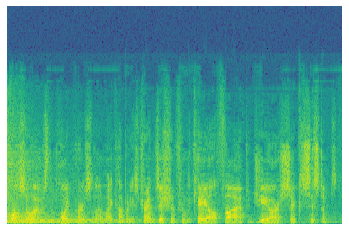

In [14]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np

sample_rate, samples = wavfile.read('soundfile.wav')
samples = samples[:,1]
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, np.log(spectrogram))
plt.axis('off')
plt.savefig("spectrogram.png", bbox_inches='tight', pad_inches=0)

In [15]:
import os.path
from os import path

def mp4_to_wav(ids):
    """
    Converts mp4 files into wav by extracting audio
    Arguments:
        ids: tuple containing dialogue and utterance id of file
    Returns:
        boolean indicating whether wav file was sucessfully created
    """
    dialog_id = ids[0]
    utterance_id = ids[1]
    # convert mp4 to .wav
    command = f"ffmpeg -i data/train_splits/dia{dialog_id}_utt{utterance_id}.mp4 -ab 160k -ac 2 -ar 44100 -vn data/train_wavs/dia{dialog_id}_utt{utterance_id}.wav"
    subprocess.call(command, shell=True)
    # verify file was actually created
    return path.exists(f"data/train_wavs/dia{dialog_id}_utt{utterance_id}.wav")

In [17]:
len(list(zip(train_main_characters.Dialogue_ID, train_main_characters.Utterance_ID)))

8306

In [73]:
dialogues = train_main_characters.Dialogue_ID.values
utterances = train_main_characters.Utterance_ID.values
ids = list(zip(dialogues, utterances))

with concurrent.futures.ProcessPoolExecutor() as executor:
    for _id, status in zip(ids, executor.map(mp4_to_wav, ids)):
        if not status:
            print("False")

False


In [34]:
import os
import concurrent.futures

def wav_to_spectrogram(wav_file):
    """
    Finds mp4 file in training directory and saves spectrogram of audio in train_imgs.
    Arguments:
        wav_file: file to convert
    Returns:
        integer: 1, to indicate successful save
    """
    sample_rate, samples = wavfile.read(f"data/train_wavs/{wav_file}")

    # audio is stereo, so take right channel to make it mono
    samples = samples[:,1]
    # generate spectrogram
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    # adjust and save to folder
    plt.pcolormesh(times, frequencies, np.log(spectrogram))
    plt.axis('off')
    plt.savefig(f"data/train_imgs/{wav_file[:-4]}.png", bbox_inches='tight', pad_inches=0)
    return 1

In [37]:
wavs = os.listdir('data/train_wavs')
def generate_spectrograms():
    # with 32gb RAM, can only do 50% at a time
    _wavs = wavs[len(wavs)//2:]
    with concurrent.futures.ProcessPoolExecutor() as executor:
        for wav, status in zip(_wavs, executor.map(wav_to_spectrogram, _wavs)):
            print(f"File at {wav} converted!")

In [38]:
generate_spectrograms()

<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))
<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia700_utt3.wav converted!
File at dia75_utt0.wav converted!


<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))
<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))
<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))
<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))
<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia793_utt4.wav converted!
File at dia287_utt3.wav converted!
File at dia841_utt2.wav converted!
File at dia124_utt8.wav converted!
File at dia1020_utt3.wav converted!
File at dia755_utt4.wav converted!
File at dia182_utt1.wav converted!
File at dia383_utt11.wav converted!
File at dia644_utt2.wav converted!
File at dia603_utt12.wav converted!
File at dia528_utt3.wav converted!
File at dia256_utt13.wav converted!
File at dia392_utt4.wav converted!
File at dia52_utt8.wav converted!
File at dia281_utt8.wav converted!
File at dia651_utt11.wav converted!
File at dia992_utt8.wav converted!
File at dia87_utt3.wav converted!
File at dia50_utt10.wav converted!
File at dia306_utt5.wav converted!
File at dia979_utt6.wav converted!
File at dia81_utt8.wav converted!
File at dia237_utt2.wav converted!
File at dia584_utt8.wav converted!
File at dia431_utt11.wav converted!
File at dia613_utt6.wav converted!
File at dia52_utt1.wav converted!
File at dia587_utt2.wav converted!
File at dia880_utt

<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia412_utt12.wav converted!
File at dia959_utt0.wav converted!
File at dia741_utt4.wav converted!
File at dia776_utt5.wav converted!


<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia32_utt11.wav converted!
File at dia248_utt5.wav converted!
File at dia559_utt6.wav converted!
File at dia99_utt13.wav converted!
File at dia927_utt0.wav converted!
File at dia860_utt2.wav converted!
File at dia122_utt3.wav converted!
File at dia827_utt15.wav converted!
File at dia923_utt0.wav converted!
File at dia814_utt3.wav converted!
File at dia913_utt8.wav converted!


<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia358_utt0.wav converted!
File at dia506_utt10.wav converted!
File at dia768_utt4.wav converted!
File at dia844_utt6.wav converted!
File at dia594_utt1.wav converted!
File at dia487_utt0.wav converted!
File at dia925_utt1.wav converted!
File at dia968_utt3.wav converted!
File at dia195_utt13.wav converted!
File at dia861_utt16.wav converted!
File at dia434_utt4.wav converted!
File at dia308_utt3.wav converted!
File at dia845_utt5.wav converted!
File at dia196_utt1.wav converted!
File at dia412_utt11.wav converted!
File at dia730_utt1.wav converted!
File at dia183_utt2.wav converted!
File at dia467_utt1.wav converted!
File at dia188_utt4.wav converted!
File at dia66_utt12.wav converted!
File at dia666_utt13.wav converted!
File at dia885_utt1.wav converted!
File at dia437_utt2.wav converted!
File at dia932_utt12.wav converted!
File at dia120_utt15.wav converted!
File at dia792_utt6.wav converted!
File at dia275_utt10.wav converted!
File at dia401_utt7.wav converted!
File at dia9

<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia336_utt17.wav converted!
File at dia412_utt0.wav converted!
File at dia905_utt14.wav converted!
File at dia625_utt17.wav converted!
File at dia637_utt0.wav converted!
File at dia1025_utt2.wav converted!
File at dia1015_utt7.wav converted!
File at dia193_utt7.wav converted!
File at dia448_utt8.wav converted!
File at dia878_utt3.wav converted!
File at dia312_utt6.wav converted!
File at dia610_utt6.wav converted!
File at dia207_utt10.wav converted!
File at dia317_utt4.wav converted!
File at dia167_utt5.wav converted!
File at dia582_utt0.wav converted!
File at dia445_utt3.wav converted!
File at dia435_utt9.wav converted!
File at dia850_utt0.wav converted!
File at dia676_utt0.wav converted!
File at dia1017_utt1.wav converted!
File at dia385_utt5.wav converted!
File at dia145_utt18.wav converted!
File at dia360_utt2.wav converted!
File at dia287_utt9.wav converted!
File at dia1026_utt14.wav converted!
File at dia847_utt1.wav converted!
File at dia871_utt4.wav converted!
File at di

<ipython-input-34-ffa67fa3aef6>:22: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(times, frequencies, np.log(spectrogram))


File at dia66_utt11.wav converted!
File at dia737_utt0.wav converted!
File at dia168_utt11.wav converted!
File at dia980_utt11.wav converted!
File at dia611_utt14.wav converted!
File at dia512_utt10.wav converted!
File at dia366_utt18.wav converted!
File at dia939_utt7.wav converted!
File at dia232_utt13.wav converted!
File at dia277_utt3.wav converted!
File at dia397_utt2.wav converted!
File at dia994_utt0.wav converted!
File at dia479_utt7.wav converted!
File at dia573_utt0.wav converted!
File at dia418_utt15.wav converted!
File at dia528_utt5.wav converted!
File at dia46_utt13.wav converted!
File at dia573_utt9.wav converted!
File at dia642_utt3.wav converted!
File at dia67_utt12.wav converted!
File at dia964_utt10.wav converted!
File at dia658_utt1.wav converted!
File at dia1038_utt7.wav converted!
File at dia168_utt1.wav converted!
File at dia336_utt6.wav converted!
File at dia29_utt2.wav converted!
File at dia281_utt5.wav converted!
File at dia804_utt4.wav converted!
File at dia4

File at dia989_utt11.wav converted!
File at dia353_utt0.wav converted!
File at dia514_utt6.wav converted!
File at dia155_utt3.wav converted!
File at dia456_utt10.wav converted!
File at dia2_utt10.wav converted!
File at dia796_utt10.wav converted!
File at dia702_utt2.wav converted!
File at dia939_utt15.wav converted!
File at dia666_utt7.wav converted!
File at dia47_utt11.wav converted!
File at dia192_utt7.wav converted!
File at dia365_utt2.wav converted!
File at dia50_utt8.wav converted!
File at dia787_utt1.wav converted!
File at dia450_utt17.wav converted!
File at dia314_utt11.wav converted!
File at dia392_utt5.wav converted!
File at dia233_utt1.wav converted!
File at dia893_utt9.wav converted!
File at dia677_utt2.wav converted!
File at dia86_utt10.wav converted!
File at dia367_utt5.wav converted!
File at dia545_utt9.wav converted!
File at dia789_utt5.wav converted!
File at dia726_utt1.wav converted!
File at dia62_utt7.wav converted!
File at dia218_utt4.wav converted!
File at dia168_ut

File at dia58_utt5.wav converted!
File at dia910_utt10.wav converted!
File at dia907_utt13.wav converted!
File at dia83_utt3.wav converted!
File at dia968_utt4.wav converted!
File at dia1002_utt0.wav converted!
File at dia787_utt6.wav converted!
File at dia899_utt0.wav converted!
File at dia146_utt3.wav converted!
File at dia319_utt13.wav converted!
File at dia96_utt2.wav converted!
File at dia740_utt2.wav converted!
File at dia990_utt19.wav converted!
File at dia626_utt5.wav converted!
File at dia874_utt5.wav converted!
File at dia379_utt5.wav converted!
File at dia442_utt2.wav converted!
File at dia172_utt8.wav converted!
File at dia421_utt3.wav converted!
File at dia424_utt2.wav converted!
File at dia834_utt6.wav converted!
File at dia855_utt1.wav converted!
File at dia352_utt1.wav converted!
File at dia623_utt9.wav converted!
File at dia153_utt9.wav converted!
File at dia182_utt3.wav converted!
File at dia853_utt2.wav converted!
File at dia46_utt14.wav converted!
File at dia938_utt

File at dia301_utt9.wav converted!
File at dia18_utt10.wav converted!
File at dia11_utt0.wav converted!
File at dia97_utt0.wav converted!
File at dia434_utt1.wav converted!
File at dia730_utt8.wav converted!
File at dia598_utt1.wav converted!
File at dia39_utt3.wav converted!
File at dia81_utt1.wav converted!
File at dia186_utt1.wav converted!
File at dia990_utt7.wav converted!
File at dia548_utt4.wav converted!
File at dia992_utt11.wav converted!
File at dia771_utt10.wav converted!
File at dia483_utt0.wav converted!
File at dia168_utt6.wav converted!
File at dia231_utt8.wav converted!
File at dia496_utt12.wav converted!
File at dia962_utt0.wav converted!
File at dia873_utt1.wav converted!
File at dia241_utt12.wav converted!
File at dia597_utt4.wav converted!
File at dia766_utt4.wav converted!
File at dia774_utt9.wav converted!
File at dia835_utt1.wav converted!
File at dia503_utt0.wav converted!
File at dia17_utt8.wav converted!
File at dia385_utt1.wav converted!
File at dia425_utt5.w

File at dia179_utt6.wav converted!
File at dia349_utt0.wav converted!
File at dia504_utt1.wav converted!
File at dia190_utt0.wav converted!
File at dia167_utt1.wav converted!
File at dia236_utt2.wav converted!
File at dia184_utt17.wav converted!
File at dia312_utt11.wav converted!
File at dia853_utt3.wav converted!
File at dia274_utt8.wav converted!
File at dia148_utt16.wav converted!
File at dia222_utt4.wav converted!
File at dia679_utt13.wav converted!
File at dia493_utt1.wav converted!
File at dia531_utt5.wav converted!
File at dia657_utt19.wav converted!
File at dia623_utt16.wav converted!
File at dia633_utt5.wav converted!
File at dia204_utt5.wav converted!
File at dia474_utt8.wav converted!
File at dia625_utt1.wav converted!
File at dia232_utt16.wav converted!
File at dia1017_utt8.wav converted!
File at dia332_utt10.wav converted!
File at dia635_utt0.wav converted!
File at dia961_utt1.wav converted!
File at dia415_utt7.wav converted!
File at dia1027_utt1.wav converted!
File at di

File at dia1006_utt2.wav converted!
File at dia788_utt0.wav converted!
File at dia412_utt15.wav converted!
File at dia679_utt6.wav converted!
File at dia120_utt9.wav converted!
File at dia599_utt13.wav converted!
File at dia739_utt6.wav converted!
File at dia770_utt2.wav converted!
File at dia869_utt9.wav converted!
File at dia840_utt2.wav converted!
File at dia260_utt2.wav converted!
File at dia527_utt4.wav converted!
File at dia310_utt2.wav converted!
File at dia546_utt0.wav converted!
File at dia817_utt11.wav converted!
File at dia595_utt6.wav converted!
File at dia456_utt9.wav converted!
File at dia922_utt8.wav converted!
File at dia965_utt1.wav converted!
File at dia239_utt3.wav converted!
File at dia886_utt7.wav converted!
File at dia238_utt2.wav converted!
File at dia943_utt5.wav converted!
File at dia549_utt0.wav converted!
File at dia383_utt5.wav converted!
File at dia313_utt1.wav converted!
File at dia258_utt2.wav converted!
File at dia833_utt6.wav converted!
File at dia228_u

File at dia1027_utt4.wav converted!
File at dia1007_utt4.wav converted!
File at dia451_utt2.wav converted!
File at dia423_utt8.wav converted!
File at dia792_utt10.wav converted!
File at dia583_utt9.wav converted!
File at dia948_utt6.wav converted!
File at dia167_utt3.wav converted!
File at dia260_utt10.wav converted!
File at dia289_utt3.wav converted!
File at dia252_utt14.wav converted!
File at dia509_utt16.wav converted!
File at dia806_utt0.wav converted!
File at dia557_utt7.wav converted!
File at dia481_utt14.wav converted!
File at dia594_utt0.wav converted!
File at dia968_utt1.wav converted!
File at dia623_utt5.wav converted!
File at dia892_utt15.wav converted!
File at dia849_utt7.wav converted!
File at dia525_utt8.wav converted!
File at dia895_utt2.wav converted!
File at dia907_utt7.wav converted!
File at dia771_utt6.wav converted!
File at dia564_utt10.wav converted!
File at dia38_utt7.wav converted!
File at dia852_utt5.wav converted!
File at dia138_utt14.wav converted!
File at dia

File at dia464_utt18.wav converted!
File at dia671_utt13.wav converted!
File at dia832_utt11.wav converted!
File at dia1016_utt12.wav converted!
File at dia684_utt1.wav converted!
File at dia25_utt3.wav converted!
File at dia356_utt2.wav converted!
File at dia40_utt13.wav converted!
File at dia676_utt5.wav converted!
File at dia794_utt6.wav converted!
File at dia1011_utt7.wav converted!
File at dia195_utt7.wav converted!
File at dia372_utt10.wav converted!
File at dia124_utt0.wav converted!
File at dia961_utt6.wav converted!
File at dia849_utt8.wav converted!
File at dia544_utt6.wav converted!
File at dia12_utt11.wav converted!
File at dia901_utt14.wav converted!
File at dia767_utt8.wav converted!
File at dia400_utt8.wav converted!
File at dia632_utt5.wav converted!
File at dia890_utt0.wav converted!
File at dia249_utt2.wav converted!
File at dia673_utt3.wav converted!
File at dia439_utt5.wav converted!
File at dia908_utt1.wav converted!
File at dia756_utt7.wav converted!
File at dia52

File at dia886_utt12.wav converted!
File at dia823_utt10.wav converted!
File at dia831_utt5.wav converted!
File at dia316_utt7.wav converted!
File at dia679_utt2.wav converted!
File at dia783_utt1.wav converted!
File at dia188_utt5.wav converted!
File at dia258_utt6.wav converted!
File at dia275_utt5.wav converted!
File at dia424_utt8.wav converted!
File at dia908_utt5.wav converted!
File at dia571_utt15.wav converted!
File at dia89_utt11.wav converted!
File at dia23_utt1.wav converted!
File at dia145_utt12.wav converted!
File at dia296_utt11.wav converted!
File at dia241_utt9.wav converted!
File at dia536_utt10.wav converted!
File at dia332_utt1.wav converted!
File at dia682_utt5.wav converted!
File at dia49_utt21.wav converted!
File at dia9_utt0.wav converted!
File at dia329_utt4.wav converted!
File at dia231_utt7.wav converted!
File at dia841_utt13.wav converted!
File at dia870_utt2.wav converted!
File at dia545_utt7.wav converted!
File at dia768_utt6.wav converted!
File at dia185_u

File at dia820_utt0.wav converted!
File at dia892_utt9.wav converted!
File at dia109_utt0.wav converted!
File at dia638_utt12.wav converted!
File at dia614_utt2.wav converted!
File at dia197_utt2.wav converted!
File at dia946_utt8.wav converted!
File at dia608_utt6.wav converted!
File at dia564_utt3.wav converted!
File at dia1038_utt15.wav converted!
File at dia361_utt0.wav converted!
File at dia674_utt3.wav converted!
File at dia6_utt9.wav converted!
File at dia312_utt17.wav converted!
File at dia814_utt4.wav converted!
File at dia746_utt0.wav converted!
File at dia493_utt0.wav converted!
File at dia312_utt3.wav converted!
File at dia113_utt2.wav converted!
File at dia806_utt7.wav converted!
File at dia214_utt8.wav converted!
File at dia664_utt7.wav converted!
File at dia206_utt7.wav converted!
File at dia541_utt12.wav converted!
File at dia45_utt4.wav converted!
File at dia15_utt6.wav converted!
File at dia250_utt2.wav converted!
File at dia648_utt0.wav converted!
File at dia794_utt3

File at dia857_utt1.wav converted!
File at dia592_utt10.wav converted!
File at dia529_utt2.wav converted!
File at dia192_utt3.wav converted!
File at dia628_utt11.wav converted!
File at dia264_utt3.wav converted!
File at dia123_utt3.wav converted!
File at dia556_utt1.wav converted!
File at dia317_utt1.wav converted!
File at dia95_utt7.wav converted!
File at dia623_utt18.wav converted!
File at dia246_utt3.wav converted!
File at dia165_utt12.wav converted!
File at dia703_utt3.wav converted!
File at dia120_utt11.wav converted!
File at dia744_utt2.wav converted!
File at dia599_utt15.wav converted!
File at dia287_utt1.wav converted!
File at dia747_utt14.wav converted!
File at dia651_utt4.wav converted!
File at dia736_utt2.wav converted!
File at dia404_utt2.wav converted!
File at dia661_utt6.wav converted!
File at dia237_utt5.wav converted!
File at dia34_utt1.wav converted!
File at dia871_utt6.wav converted!
File at dia273_utt2.wav converted!
File at dia645_utt4.wav converted!
File at dia337_

File at dia372_utt3.wav converted!
File at dia488_utt3.wav converted!
File at dia247_utt0.wav converted!
File at dia1025_utt5.wav converted!
File at dia813_utt10.wav converted!
File at dia840_utt9.wav converted!
File at dia310_utt5.wav converted!
File at dia446_utt18.wav converted!
File at dia414_utt0.wav converted!
File at dia1005_utt3.wav converted!
File at dia933_utt11.wav converted!
File at dia712_utt9.wav converted!
File at dia393_utt7.wav converted!
File at dia681_utt3.wav converted!
File at dia573_utt2.wav converted!
File at dia197_utt6.wav converted!
File at dia848_utt2.wav converted!
File at dia628_utt13.wav converted!
File at dia632_utt13.wav converted!
File at dia886_utt9.wav converted!
File at dia523_utt15.wav converted!
File at dia20_utt0.wav converted!
File at dia231_utt11.wav converted!
File at dia939_utt10.wav converted!
File at dia666_utt6.wav converted!
File at dia860_utt9.wav converted!
File at dia223_utt6.wav converted!
File at dia304_utt0.wav converted!
File at dia

File at dia171_utt7.wav converted!
File at dia962_utt1.wav converted!
File at dia8_utt2.wav converted!
File at dia794_utt1.wav converted!
File at dia120_utt10.wav converted!
File at dia15_utt20.wav converted!
File at dia1018_utt0.wav converted!
File at dia129_utt5.wav converted!
File at dia226_utt19.wav converted!
File at dia532_utt13.wav converted!
File at dia903_utt2.wav converted!
File at dia499_utt12.wav converted!
File at dia531_utt8.wav converted!
File at dia690_utt3.wav converted!
File at dia997_utt1.wav converted!
File at dia177_utt8.wav converted!
File at dia839_utt4.wav converted!
File at dia832_utt12.wav converted!
File at dia855_utt3.wav converted!
File at dia643_utt3.wav converted!
File at dia763_utt10.wav converted!
File at dia527_utt1.wav converted!
File at dia222_utt1.wav converted!
File at dia1018_utt6.wav converted!
File at dia891_utt3.wav converted!
File at dia384_utt0.wav converted!
File at dia516_utt0.wav converted!
File at dia796_utt0.wav converted!
File at dia671

File at dia561_utt12.wav converted!
File at dia1009_utt15.wav converted!
File at dia644_utt5.wav converted!
File at dia405_utt5.wav converted!
File at dia279_utt0.wav converted!
File at dia236_utt4.wav converted!
File at dia347_utt0.wav converted!
File at dia707_utt12.wav converted!
File at dia853_utt0.wav converted!
File at dia959_utt5.wav converted!
File at dia890_utt2.wav converted!
File at dia861_utt14.wav converted!
File at dia483_utt5.wav converted!
File at dia179_utt19.wav converted!
File at dia241_utt3.wav converted!
File at dia219_utt6.wav converted!
File at dia980_utt7.wav converted!
File at dia165_utt18.wav converted!
File at dia1018_utt16.wav converted!
File at dia973_utt7.wav converted!
File at dia135_utt1.wav converted!
File at dia207_utt17.wav converted!
File at dia516_utt3.wav converted!
File at dia531_utt1.wav converted!
File at dia351_utt4.wav converted!
File at dia670_utt9.wav converted!
File at dia464_utt9.wav converted!
File at dia989_utt3.wav converted!
File at di

File at dia649_utt15.wav converted!
File at dia649_utt5.wav converted!
File at dia123_utt6.wav converted!
File at dia763_utt4.wav converted!
File at dia116_utt1.wav converted!
File at dia113_utt6.wav converted!
File at dia597_utt1.wav converted!
File at dia468_utt3.wav converted!
File at dia90_utt0.wav converted!
File at dia808_utt6.wav converted!
File at dia736_utt10.wav converted!
File at dia896_utt4.wav converted!
File at dia996_utt4.wav converted!
File at dia757_utt6.wav converted!
File at dia336_utt4.wav converted!
File at dia10_utt1.wav converted!
File at dia576_utt2.wav converted!
File at dia679_utt14.wav converted!
File at dia905_utt9.wav converted!
File at dia900_utt3.wav converted!
File at dia983_utt5.wav converted!
File at dia541_utt5.wav converted!
File at dia679_utt11.wav converted!
File at dia389_utt9.wav converted!
File at dia526_utt0.wav converted!
File at dia336_utt0.wav converted!
File at dia33_utt1.wav converted!
File at dia652_utt10.wav converted!
File at dia793_utt

File at dia858_utt5.wav converted!
File at dia342_utt18.wav converted!
File at dia126_utt9.wav converted!
File at dia349_utt2.wav converted!
File at dia64_utt3.wav converted!
File at dia986_utt13.wav converted!
File at dia770_utt12.wav converted!
File at dia46_utt11.wav converted!
File at dia179_utt14.wav converted!
File at dia186_utt5.wav converted!
File at dia688_utt0.wav converted!
File at dia315_utt7.wav converted!
File at dia926_utt14.wav converted!
File at dia317_utt15.wav converted!
File at dia64_utt4.wav converted!
File at dia511_utt6.wav converted!
File at dia409_utt2.wav converted!
File at dia66_utt5.wav converted!
File at dia63_utt5.wav converted!
File at dia736_utt0.wav converted!
File at dia125_utt1.wav converted!
File at dia904_utt0.wav converted!
File at dia846_utt0.wav converted!
File at dia855_utt6.wav converted!
File at dia332_utt14.wav converted!
File at dia451_utt4.wav converted!
File at dia962_utt2.wav converted!
File at dia841_utt8.wav converted!
File at dia932_ut

File at dia149_utt2.wav converted!
File at dia909_utt8.wav converted!
File at dia170_utt0.wav converted!
File at dia115_utt5.wav converted!
File at dia93_utt5.wav converted!
File at dia727_utt9.wav converted!
File at dia275_utt16.wav converted!
File at dia601_utt3.wav converted!
File at dia798_utt4.wav converted!
File at dia875_utt4.wav converted!
File at dia195_utt15.wav converted!
File at dia329_utt0.wav converted!
File at dia79_utt1.wav converted!
File at dia610_utt1.wav converted!
File at dia499_utt17.wav converted!
File at dia673_utt8.wav converted!
File at dia659_utt10.wav converted!
File at dia323_utt0.wav converted!
File at dia440_utt1.wav converted!
File at dia658_utt13.wav converted!
File at dia541_utt11.wav converted!
File at dia1038_utt11.wav converted!
File at dia737_utt3.wav converted!
File at dia963_utt0.wav converted!
File at dia296_utt17.wav converted!
File at dia349_utt3.wav converted!
File at dia58_utt9.wav converted!
File at dia352_utt2.wav converted!
File at dia99_

In [69]:
ids

[(0, 0),
 (0, 2),
 (0, 4),
 (0, 6),
 (0, 8),
 (0, 10),
 (0, 12),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 8),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (5, 0),
 (5, 1),
 (5, 2),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (6, 18),
 (6, 19),
 (6, 20),
 (6, 21),
 (7, 0),
 (7, 1),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 4),
 (8, 6),
 (9, 0),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 7),
 (9, 9),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (11, 0),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 7